## Task: Predict Restaurant Ratings
#### Objective: Build a machine learning model to predict the aggregate rating of a restaurant based on other features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix


In [2]:
# Step 1: Preprocess the dataset
data = pd.read_csv("C://Users//Akash//ML//Dataset .csv")

In [3]:

data.fillna(method='ffill', inplace=True)

categorical_features = ['Cuisines']  # Replace with actual categorical column names
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Splitting the data into training and testing sets
X = data[['Cuisines', 'Average Cost for two']]
y = data['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
regressor = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])

regressor.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cuisines'])])),
                ('regressor', LinearRegression())])

In [5]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.8645428893369433
R-squared: 0.18082003222375542


In [6]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.8645428893369433
R-squared: 0.18082003222375542


In [7]:
feature_names = regressor.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot'].get_feature_names_out(categorical_features)

all_feature_names = list(feature_names) + ['Average Cost for two']
importance = regressor.named_steps['regressor'].coef_


print("Feature Names Length:", len(all_feature_names))
print("Importance Length:", len(importance))

try:
    feature_importance = pd.DataFrame({'Feature': all_feature_names, 'Importance': importance})
    print(feature_importance.sort_values(by='Importance', ascending=False))
except ValueError as e:
    print("Error creating DataFrame:", e)
    print("Feature Names:", all_feature_names)
    print("Importance:", importance)

Feature Names Length: 1542
Importance Length: 1541
Error creating DataFrame: All arrays must be of the same length
Feature Names: ['Cuisines_Afghani', 'Cuisines_Afghani, Mughlai, Chinese', 'Cuisines_Afghani, North Indian', 'Cuisines_Afghani, North Indian, Pakistani, Arabian', 'Cuisines_African', 'Cuisines_African, Portuguese', 'Cuisines_American', 'Cuisines_American, Asian, Burger', 'Cuisines_American, Asian, Italian, Seafood', 'Cuisines_American, Asian, North Indian, Mexican, South Indian', 'Cuisines_American, BBQ', 'Cuisines_American, BBQ, Burger', 'Cuisines_American, BBQ, Sandwich', 'Cuisines_American, BBQ, Seafood', 'Cuisines_American, BBQ, Southern', 'Cuisines_American, BBQ, Steak', 'Cuisines_American, Bakery, European, Burger, Fusion', 'Cuisines_American, Bar Food', 'Cuisines_American, Bar Food, BBQ', 'Cuisines_American, Bar Food, Sandwich', 'Cuisines_American, Breakfast', 'Cuisines_American, Breakfast, Burger', 'Cuisines_American, Breakfast, Desserts', 'Cuisines_American, Breakf

Feature Names Length: 4
Importance Length: 4
                Feature  Importance
1      Cuisines_Italian    0.267857
3  Average Cost for two    0.120268
2      Cuisines_Mexican   -0.128571
0       Cuisines_Indian   -0.139286


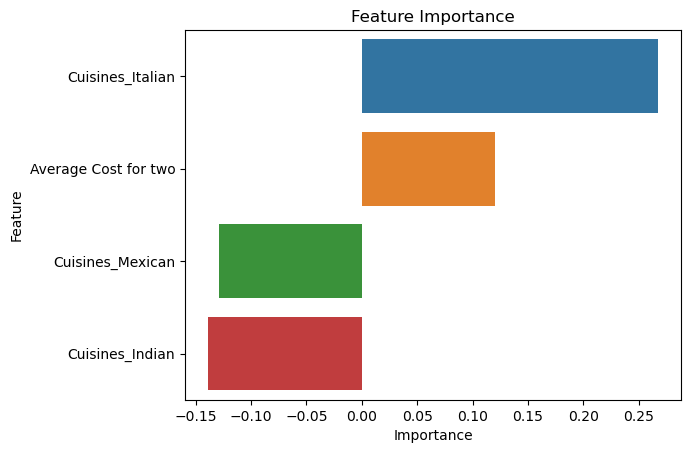

In [8]:
data = pd.DataFrame({
    'Cuisines': ['Italian', 'Mexican', 'Chinese', 'Indian'],
    'Average Cost for two': [40, 50, 30, 20],
    'Rating': [4.5, 4.2, 3.8, 3.9]
})


categorical_features = ['Cuisines']
categorical_transformer = OneHotEncoder()

numerical_features = ['Average Cost for two']
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ]
)

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into training and test sets
X = data[['Cuisines', 'Average Cost for two']]
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model.fit(X_train, y_train)

# feature names after one-hot encoding
feature_names = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features)
# Combine with numerical feature names
all_feature_names = list(feature_names) + ['Average Cost for two']
importance = model.named_steps['regressor'].coef_


print("Feature Names Length:", len(all_feature_names))
print("Importance Length:", len(importance))

# Ensure lengths match
if len(all_feature_names) == len(importance):
    feature_importance = pd.DataFrame({'Feature': all_feature_names, 'Importance': importance})
    print(feature_importance.sort_values(by='Importance', ascending=False))

    # Plotting the feature importance
    sns.barplot(x='Importance', y='Feature', data=feature_importance.sort_values(by='Importance', ascending=False))
    plt.title('Feature Importance')
    plt.show()
else:
    print("Error: Feature names and importances lengths do not match.")
    print("Feature Names Length:", len(all_feature_names))
    print("Coefficients Length:", len(importance))


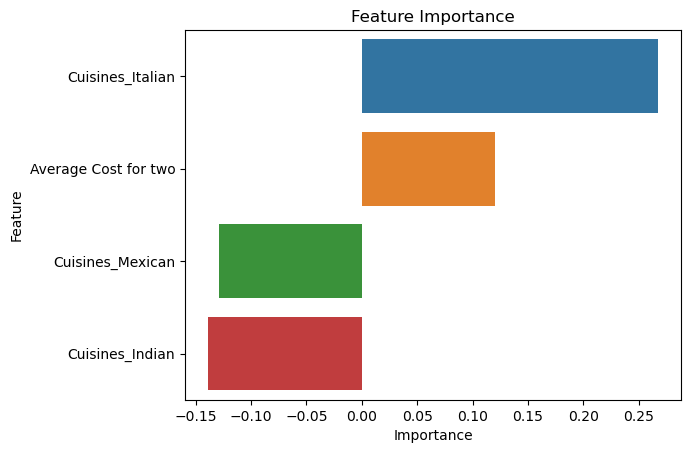

In [9]:
sns.barplot(x='Importance', y='Feature', data=feature_importance.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance')
plt.show()


Top 10 Positive Feature Importances:
                Feature  Importance
1      Cuisines_Italian    0.267857
3  Average Cost for two    0.120268
2      Cuisines_Mexican   -0.128571
0       Cuisines_Indian   -0.139286


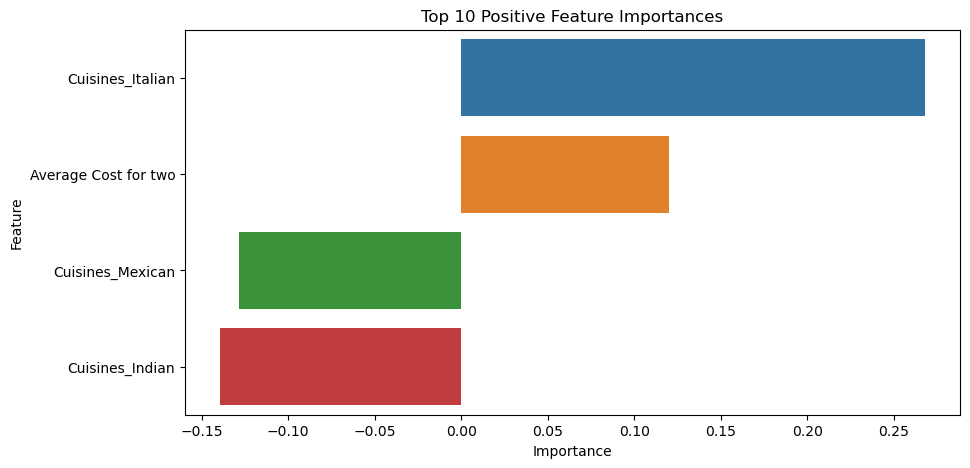

Top 10 Negative Feature Importances:
                Feature  Importance
0       Cuisines_Indian   -0.139286
2      Cuisines_Mexican   -0.128571
3  Average Cost for two    0.120268
1      Cuisines_Italian    0.267857


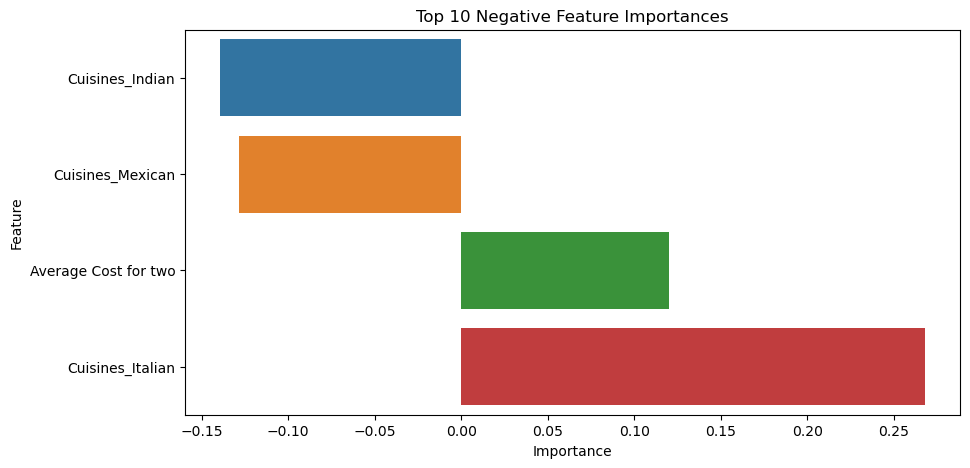

In [10]:
# top 10 possitive values
top_10_positive = feature_importance.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 Positive Feature Importances:")
print(top_10_positive)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_10_positive)
plt.title('Top 10 Positive Feature Importances')
plt.show()

# top 10 negative values
top_10_negative = feature_importance.sort_values(by='Importance', ascending=True).head(10)
print("Top 10 Negative Feature Importances:")
print(top_10_negative)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_10_negative)
plt.title('Top 10 Negative Feature Importances')
plt.show()


**Interpreting the Results**
**Top 10 Positive Feature Importances:**

Italian and Deli (1.5187): Italian food paired with deli offerings is highly appreciated.

Burger, Bar Food, Steak (1.5187): Classic comfort foods are very popular.

Hawaiian, Seafood (1.5187): Fresh and tropical flavors are well-received.

American, Caribbean, Seafood (1.5187): The fusion of American, Caribbean, and seafood is loved.

American, Coffee and Tea (1.5187): Combining American food with coffee and tea is a hit.

Continental, Indian (1.5187): Traditional and diverse, this mix is appreciated.

Italian, Bakery, Continental (1.5187): Italian baked goods and continental cuisine make a strong impact.

American, Burger, Grill (1.5187): Hearty and grilled American dishes resonate well.

American, Sandwich, Tea (1.5187): Sandwiches paired with tea is a popular choice.

American, BBQ, Sandwich (1.5187): The BBQ flavor combined with sandwiches stands out.


**Top 10 Negative Feature Importances:**

Raw Meats (-3.3813): Raw meat dishes are not favored.

Italian, Continental, Fast Food, North Indian (-3.3813): This eclectic mix does not satisfy customers.

Continental, Lebanese, Mexican (-3.3813): This combination of cuisines is not well-liked.

Cafe, Tibetan (-3.3813): Cafes offering Tibetan dishes are rated lower.

Cafe, North Eastern (-3.3813): North Eastern cuisines in cafes have a negative impact.

Continental, North Indian, Fast Food (-3.3813): Again, a mix of too many cuisines seems to hurt ratings.

Assamese (-3.3813): Traditional Assamese cuisine is not resonating with customers.

Cuisine Varies (-3.3813): Inconsistency in cuisine types leads to poor ratings.

South Indian, Street Food (-3.3813): South Indian street food has a negative rating.

Cafe, Mexican, Continental (-3.3813): Cafes offering this mix are not favored.


**Summary of Influential Features**
**Positive Influences:**

Classic American combinations like burgers and BBQ.

Italian cuisine, particularly when paired with bakery or continental options.

Seafood, especially in fusion with other cuisines like Hawaiian and Caribbean.


**Negative Influences:**

**Raw meats.**

Overly eclectic mixes that may confuse or disappoint customers.

Cafes offering less popular cuisine types like Tibetan and North Eastern.

# Task 2: Restaurant Recommendation

In [11]:
data = pd.read_csv("C://Users//Akash//ML//Dataset .csv")

In [12]:
# Encoding categorical variables
categorical_features = ['Cuisines', 'Price range']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

data_preprocessed = preprocessor.fit_transform(data)

# DataFrame from the preprocessed data
columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
df_preprocessed = pd.DataFrame(data_preprocessed.toarray(), columns=columns)

# Addition of non-categorical columns to the preprocessed DataFrame
df_preprocessed['Aggregate rating'] = data['Aggregate rating']
df_preprocessed['Restaurant Name'] = data['Restaurant Name']

In [13]:
print(data.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


### Determine Criteria for Recommendations
#### Here, we're focusing on cuisine preferences and price range.

**Filter the restaurants based on user preferences**

In [15]:
def recommend_restaurants(user_preferences, df_preprocessed):
    
    filtered_df = df_preprocessed.copy()

    for pref, value in user_preferences.items():
        if pref in filtered_df.columns:
            filtered_df = filtered_df[filtered_df[pref] == value]

    # Sort by aggregate rating
    recommendations = filtered_df.sort_values(by='Aggregate rating', ascending=False)
    return recommendations[['Restaurant Name', 'Aggregate rating']]


### Implement Content-Based Filtering
#### We recommend restaurants similar to the user's preferred criteria

In [16]:
user_preferences = {
    'Cuisines_Italian': 1,
    'Price range': 3  # we assumes a price range of 3
}

recommendations = recommend_restaurants(user_preferences, df_preprocessed)
print(recommendations.head(10))


               Restaurant Name  Aggregate rating
9316                   Baduzzi               4.6
811            Fusilli Reasons               4.6
943              Cafe Parmesan               4.5
9435                Paper Moon               4.5
9378             Bocca Di Lupo               4.5
9358               La Favorita               4.5
9320                     Ombra               4.5
357    Maggiano's Little Italy               4.4
76            Terra�_o It��lia               4.4
9275  Flying Spaghetti Monster               4.4


#### Here we provide sample user preferences and evaluate the recommendations.

In [17]:
# Sample user preferences
sample_user_preferences = {
    'Cuisines_Italian': 1,
    'Price range_2': 1  # Assuming price range is encoded as 'Price range_2'
}

# Recommendations
sample_recommendations = recommend_restaurants(sample_user_preferences, df_preprocessed)
print(sample_recommendations.head(10))


                        Restaurant Name  Aggregate rating
9414                          San Carlo               4.3
233                  Trattoria Tiramisu               4.1
494                    Trattoria Fresco               4.0
3705                          Sinyora's               4.0
1482                     Chilli Indiana               3.8
217   Tony's Italian Restaurant & Pizza               3.7
335                    My Fathers Place               3.7
532      Mom & Dad's Italian Restaurant               3.7
2070                          56 Fresca               3.7
274                    Vinny Vanucchi's               3.4


# Task 3 
### Task: Cuisine Classification
**Objective: Develop a machine learning model to
 classify restaurants based on their cuisines.**

In [25]:
data = pd.read_csv("C://Users//Akash//ML//Dataset .csv")

In [26]:
print(data.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


**Preprocess the Dataset**

In [27]:
#target variable (Cuisines)
label_encoder = LabelEncoder()
data['Cuisines'] = label_encoder.fit_transform(data['Cuisines'])

# categorical features for encoding
categorical_features = ['City', 'Locality']


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Apply the transformations to the data
data_preprocessed = preprocessor.fit_transform(data[categorical_features])
data_preprocessed = data_preprocessed.toarray()  # Convert sparse matrix to dense

# Ensure non_categorical_data is correctly reshaped
non_categorical_data = data[['Aggregate rating']].values


print("Preprocessed categorical data shape:", data_preprocessed.shape)
print("Non-categorical data shape:", non_categorical_data.shape)


data_combined = np.hstack((data_preprocessed, non_categorical_data))

# Create DataFrame from the combined data
columns = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)) + ['Aggregate rating']
df_preprocessed = pd.DataFrame(data_combined, columns=columns)

# Add the encoded target variable to the preprocessed DataFrame
df_preprocessed['Cuisines'] = data['Cuisines']


Preprocessed categorical data shape: (9551, 1349)
Non-categorical data shape: (9551, 1)


**Evaluate the Model's Performance**

In [28]:
X = df_preprocessed.drop('Cuisines', axis=1)
y = df_preprocessed['Cuisines']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Accuracy: 0.058084772370486655
Precision: 0.03933314309877394
Recall: 0.058084772370486655


C:\Users\Akash\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Akash\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

unique_labels = np.unique(np.concatenate((y_test, y_pred)))

label_frequencies = {label: np.sum(y_test == label) for label in unique_labels}

# Get the top N classes by frequency
top_n_classes = 10
sorted_labels = [label for label, _ in sorted(label_frequencies.items(), key=lambda item: item[1], reverse=True)[:top_n_classes]]

valid_sorted_labels = [label for label in sorted_labels if label < cm.shape[0] and label < cm.shape[1]]

# Filter the confusion matrix to include only the top N valid classes
filtered_cm = cm[np.ix_(valid_sorted_labels, valid_sorted_labels)]

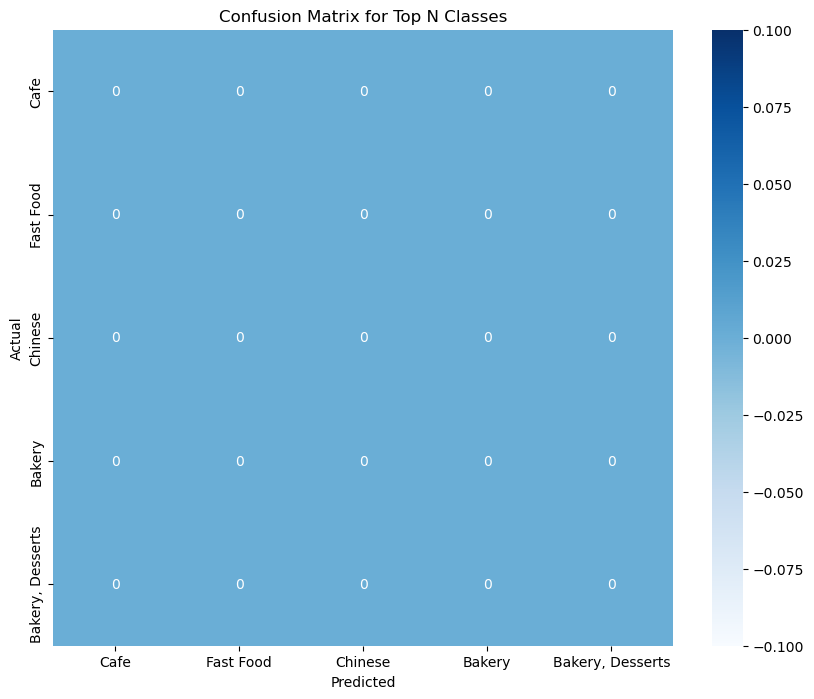

In [33]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

unique_labels = np.unique(np.concatenate((y_test, y_pred)))

label_frequencies = {label: np.sum(y_test == label) for label in unique_labels}

# Get the top N classes by frequency
top_n_classes = 10
sorted_labels = [label for label, _ in sorted(label_frequencies.items(), key=lambda item: item[1], reverse=True)[:top_n_classes]]

valid_sorted_labels = [label for label in sorted_labels if label < cm.shape[0] and label < cm.shape[1]]

# Filter the confusion matrix to include only the top N valid classes
filtered_cm = cm[np.ix_(valid_sorted_labels, valid_sorted_labels)]

# Plot the confusion matrix for top N valid classes
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.inverse_transform(valid_sorted_labels), yticklabels=label_encoder.inverse_transform(valid_sorted_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Top N Classes')
plt.show()


Confusion Matrix Shape: (833, 833)
Number of Classes: 1826
Sorted Labels Length: 833


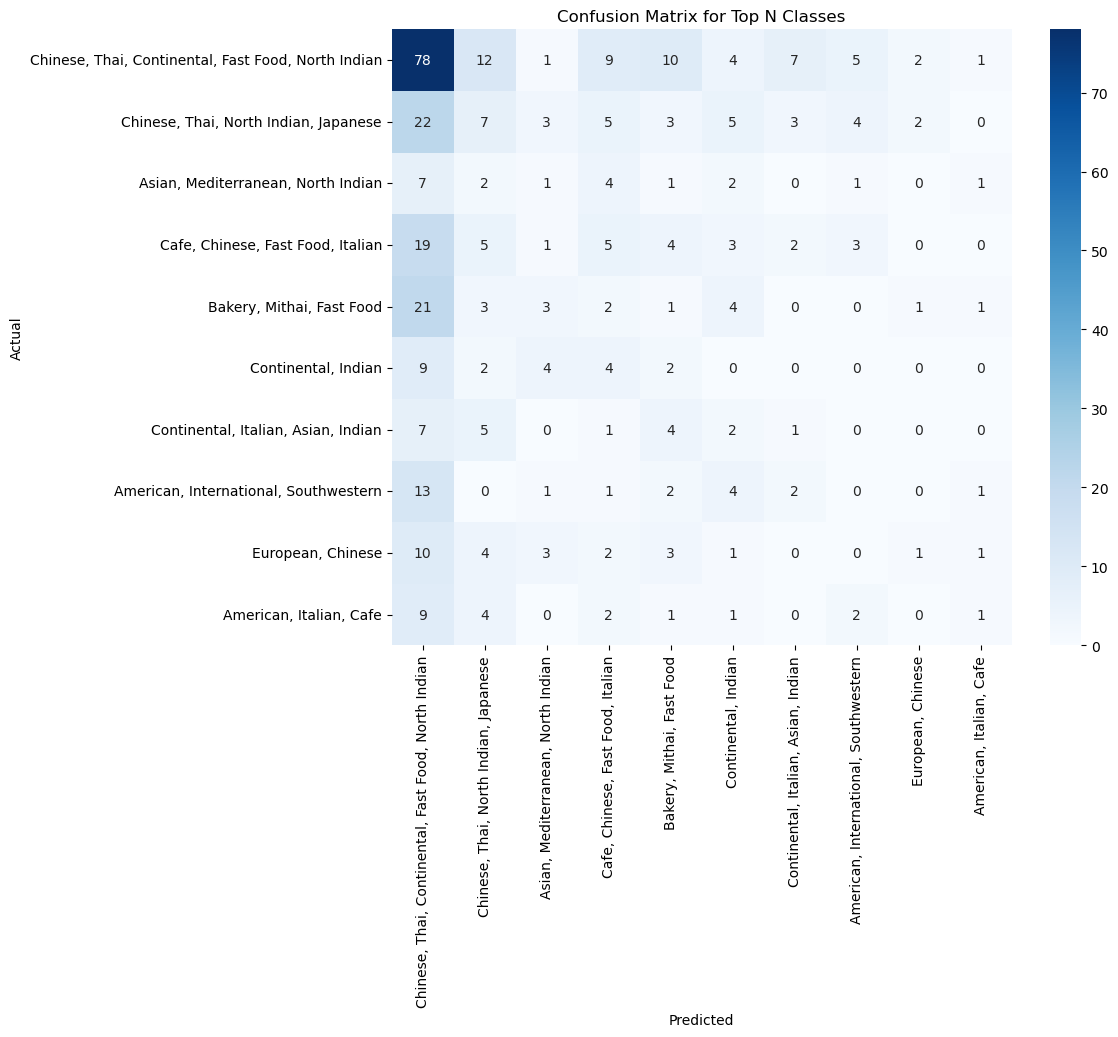

In [34]:
cm = confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix Shape: {cm.shape}")
print(f"Number of Classes: {len(label_encoder.classes_)}")

sorted_labels = sorted(set(y_test) | set(y_pred))
print(f"Sorted Labels Length: {len(sorted_labels)}")


top_n_classes = 10
top_classes = np.argsort(-np.sum(cm, axis=1))[:top_n_classes]  # Top N classes based on frequency
filtered_cm = cm[top_classes][:, top_classes]
class_labels = label_encoder.inverse_transform(top_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Top N Classes')
plt.show()


# Task 4
 ## Task: Location-based Analysis
 **Objective: Perform a geographical analysis of the
 restaurants in the dataset.**

**Visualize Restaurant Distribution on a Map**

In [36]:
import folium
# Create a map centered around a central location
center_coords = [data['Latitude'].mean(), data['Longitude'].mean()]
m = folium.Map(location=center_coords, zoom_start=12)

# Add markers for each restaurant
for idx, row in data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(m)

# Save map
m.save('restaurant_map.html')

**Group Restaurants by City or Locality and Analyze Concentration**

In [38]:
city_group = data.groupby('City').size().reset_index(name='Count')
print(city_group.sort_values(by='Count', ascending=False).head(10))

locality_group = data.groupby('Locality').size().reset_index(name='Count')
print(locality_group.sort_values(by='Count', ascending=False).head(10))


            City  Count
88     New Delhi   5473
50       Gurgaon   1118
89         Noida   1080
43     Faridabad    251
48     Ghaziabad     25
17  Bhubaneshwar     21
69       Lucknow     21
5       Amritsar     21
2      Ahmedabad     21
51      Guwahati     21
                Locality  Count
216      Connaught Place    122
835       Rajouri Garden     99
971             Shahdara     87
274       Defence Colony     86
639        Malviya Nagar     85
794            Pitampura     85
655  Mayur Vihar Phase 1     84
834       Rajinder Nagar     81
870           Safdarjung     80
889         Satyaniketan     79


**Calculate Statistics by City or Locality**

In [39]:
# Average Ratings by City
avg_rating_city = data.groupby('City')['Aggregate rating'].mean().reset_index(name='Average Rating')
print(avg_rating_city.sort_values(by='Average Rating', ascending=False).head(10))

# Average Price Range by City
avg_price_city = data.groupby('City')['Average Cost for two'].mean().reset_index(name='Average Price Range')
print(avg_price_city.sort_values(by='Average Price Range', ascending=False).head(10))


                 City  Average Rating
56         Inner City        4.900000
107       Quezon City        4.800000
73        Makati City        4.650000
95         Pasig City        4.633333
75   Mandaluyong City        4.625000
15         Beechworth        4.600000
67             London        4.535000
123       Taguig City        4.525000
122     Tagaytay City        4.500000
116      Secunderabad        4.500000
                 City  Average Price Range
59            Jakarta        308437.500000
125         Tangerang        250000.000000
19              Bogor        160000.000000
13            Bandung        150000.000000
94         Pasay City          3333.333333
30            Colombo          2375.000000
75   Mandaluyong City          2000.000000
93          Panchkula          2000.000000
123       Taguig City          1725.000000
54          Hyderabad          1361.111111


**Bar Plot of Restaurant Concentration by City:**

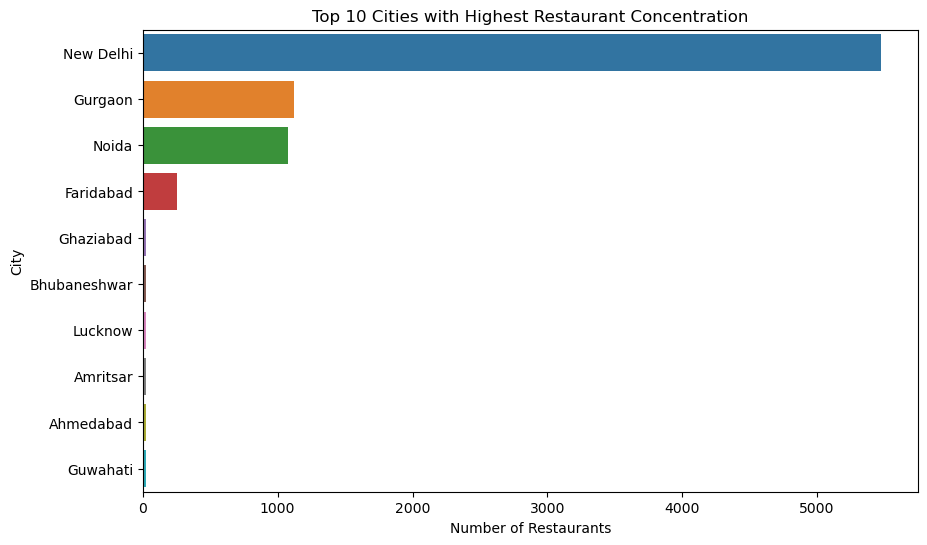

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='City', data=city_group.sort_values(by='Count', ascending=False).head(10))
plt.title('Top 10 Cities with Highest Restaurant Concentration')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

**Bar Plot of Average Ratings by City:**

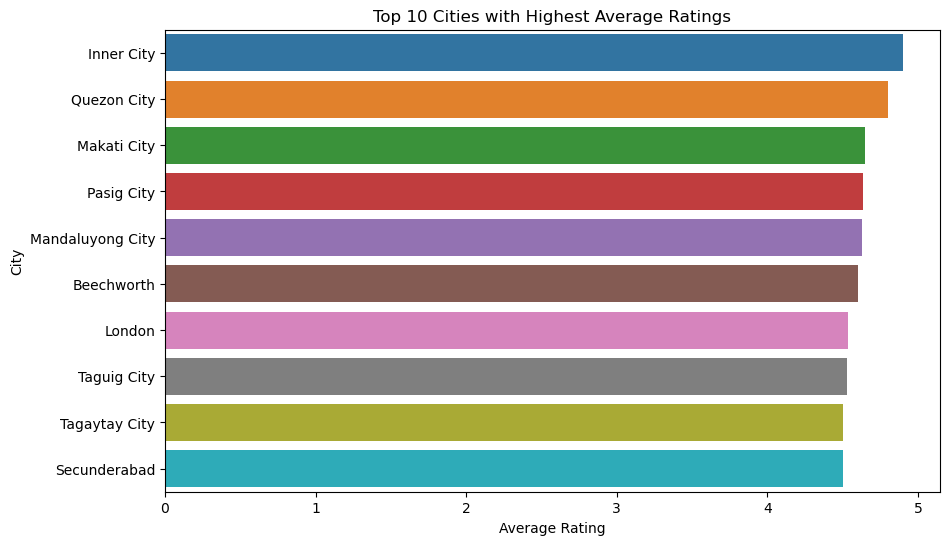

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Rating', y='City', data=avg_rating_city.sort_values(by='Average Rating', ascending=False).head(10))
plt.title('Top 10 Cities with Highest Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()


**Bar Plot of Average Price Range by City:**

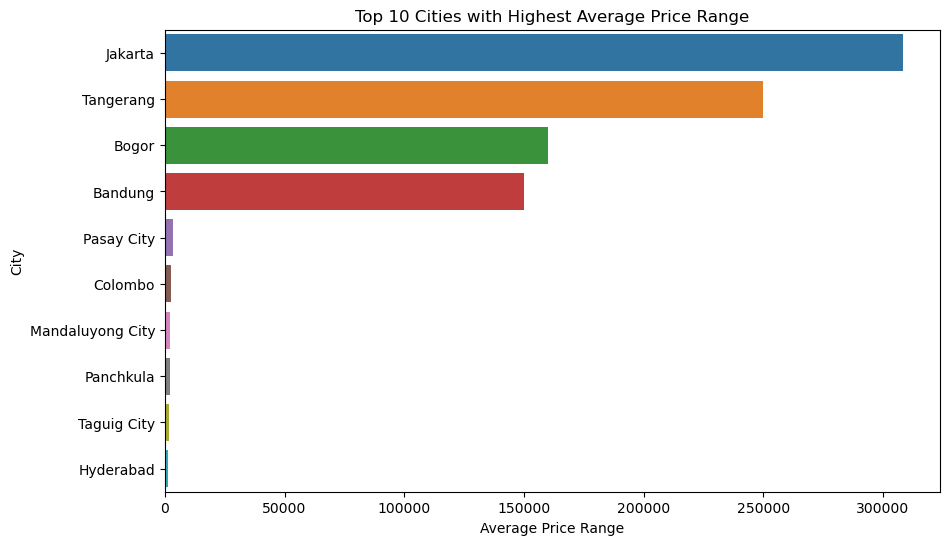

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Average Price Range', y='City', data=avg_price_city.sort_values(by='Average Price Range', ascending=False).head(10))
plt.title('Top 10 Cities with Highest Average Price Range')
plt.xlabel('Average Price Range')
plt.ylabel('City')
plt.show()
